In [1]:
import pandas as pd
import category_encoders as ce
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from kmodes.kmodes import KModes
import seaborn as sns
import plotly.express as px

In [15]:
data_2014 = pd.read_excel("2014 a 2018-1.xlsx")

In [17]:
data_2019 = pd.read_excel("2018-2 a 2019.xlsx")

In [73]:
data_2020 = pd.read_excel("2020-2 a 2023-2(1).xlsx")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332433 entries, 0 to 332432
Data columns (total 60 columns):
 #   Column                                            Non-Null Count   Dtype  
---  ------                                            --------------   -----  
 0   Data de cadastro                                  332433 non-null  object 
 1   Canal de atendimento                              332406 non-null  object 
 2   Denúncia emergencial                              331996 non-null  object 
 3   Denunciante                                       332388 non-null  object 
 4   Cenário da violação                               331096 non-null  object 
 5   País                                              332369 non-null  object 
 6   UF                                                320538 non-null  object 
 7   Município                                         317770 non-null  object 
 8   Frequência                                        316039 non-null  object 
 9   Iníc

# Dados 2014

In [36]:
data_2014.head()

,Data de cadastro,UF,Munícipio,Violação,Residência,Filhos violência,Relação vítima-suspeito,Comportamento efeito agressor,Tipo de violência,Violência familiar,...,Coabitação contexto,Risco contexto,Sexo da vítima,Sexo do suspeito,Raça\Cor da vítima,Raça\Cor do suspeito,Faixa etária da vítima,Faixa etária do suspeito,Grau de instrução da vítima,Grau de instrução do suspeito
0,43114 days,ES,SERRA,LESÃO CORPORAL LEVE,NaN,NaN,PAI,NaN,VIOLENCIA FISICA,SIM,...,SIM,NaN,FEMININO,MASCULINO,NaN,NaN,ATÉ 9 ANOS,ENTRE 20 E 24 ANOS,NaN,NaN
1,43114 days,MG,MONTES CLAROS,LESÃO CORPORAL GRAVE; AMEAÇA; CALÚNIA; DANO EM...,ZONA URBANA,NaN,CONHECIDO,SEMPRE,VIOLENCIA FISICA,NÃO,...,NÃO,DANO FÍSICO,FEMININO,MASCULINO,BRANCA,PARDA,ENTRE 15 E 19 ANOS,ENTRE 20 E 24 ANOS,NaN,ENSINO MÉDIO
2,43134 days,PI,TERESINA,AMEAÇA,ZONA URBANA,NaN,NaN,NaN,VIOLENCIA PSICOLOGICA,SIM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,43134 days,PA,PARAUAPEBAS,DIFAMAÇÃO; VIOLÊNCIA PATRIMONIAL; CALÚNIA; AME...,ZONA URBANA,PRESENCIAM A VIOLÊNCIA,EX COMPANHEIRO,OUTRO,VIOLENCIA PSICOLOGICA,SIM,...,NÃO,HOMICÍDIO,FEMININO,MASCULINO,PARDA,BRANCA,ENTRE 35 E 39 ANOS,ENTRE 35 E 39 ANOS,ENSINO MÉDIO,ENSINO MÉDIO
4,43134 days,NaN,NaN,DIFAMAÇÃO; CÁRCERE PRIVADO; DANO EMOCIONAL/DIM...,ZONA URBANA,NaN,OUTRO(A),SEMPRE,VIOLENCIA PSICOLOGICA,SIM,...,SIM,DANO PSICOLÓGICO,FEMININO,MASCULINO,NaN,NaN,ENTRE 25 E 29 ANOS,ENTRE 40 E 44 ANOS,NÃO SOUBE INFORMAR,NaN


In [18]:
data_2014.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496590 entries, 0 to 496589
Data columns (total 26 columns):
 #   Column                            Non-Null Count   Dtype          
---  ------                            --------------   -----          
 0   Data de cadastro                  496590 non-null  timedelta64[ns]
 1   UF                                417139 non-null  object         
 2   Munícipio                         417211 non-null  object         
 3   Violação                          459378 non-null  object         
 4   Residência                        374649 non-null  object         
 5   Filhos violência                  205447 non-null  object         
 6   Relação vítima-suspeito           419388 non-null  object         
 7   Comportamento efeito agressor     157494 non-null  object         
 8   Tipo de violência                 496590 non-null  object         
 9   Violência familiar                482409 non-null  object         
 10  Denunciante         

In [59]:
columns_vitima_14 = [
    "Data de cadastro","UF",
    "Frequência",
    "Munícipio",
    "Relação vítima-suspeito",
    "Faixa etária da vítima",
    #"Faixa de renda da vítima",
    "Raça\\Cor da vítima",
    "Coabitação contexto",
    "Violência familiar",
    "Filhos violência",
    "Residência",
    "Dependência Financeira da Vítima",
    "Tipo de violência",
    "Tempo de violência contexto",
    "Risco contexto",
    "Grau de instrução da vítima"
    #"Profissão da vítima",
    #"UF da vítima",
    #falta cenário de violação e estado civil!
]

columns_suspeito_14 = [
    "Sexo do suspeito",
    "Grau de instrução do suspeito",
    "Raça\\Cor do suspeito",
    "Faixa etária do suspeito",
    "Drogas Álcool Suspeito"
    #"UF do suspeito",
    #"Profissão do suspeito"
    
]

dash_14 = pd.concat([data_2014[columns_vitima_14], data_2014[columns_suspeito_14]], axis=1)

In [60]:
dash_14.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496590 entries, 0 to 496589
Data columns (total 21 columns):
 #   Column                            Non-Null Count   Dtype          
---  ------                            --------------   -----          
 0   Data de cadastro                  496590 non-null  timedelta64[ns]
 1   UF                                417139 non-null  object         
 2   Frequência                        307727 non-null  object         
 3   Munícipio                         417211 non-null  object         
 4   Relação vítima-suspeito           419388 non-null  object         
 5   Faixa etária da vítima            392241 non-null  object         
 6   Raça\Cor da vítima                347451 non-null  object         
 7   Coabitação contexto               374204 non-null  object         
 8   Violência familiar                482409 non-null  object         
 9   Filhos violência                  205447 non-null  object         
 10  Residência          

In [61]:
dash_14.notnull().sum()

Data de cadastro                    496590
UF                                  417139
Frequência                          307727
Munícipio                           417211
Relação vítima-suspeito             419388
Faixa etária da vítima              392241
Raça\Cor da vítima                  347451
Coabitação contexto                 374204
Violência familiar                  482409
Filhos violência                    205447
Residência                          374649
Dependência Financeira da Vítima    297787
Tipo de violência                   496590
Tempo de violência contexto         286641
Risco contexto                      304492
Grau de instrução da vítima         320526
Sexo do suspeito                    471043
Grau de instrução do suspeito       170380
Raça\Cor do suspeito                289383
Faixa etária do suspeito            310543
Drogas Álcool Suspeito              258462
dtype: int64

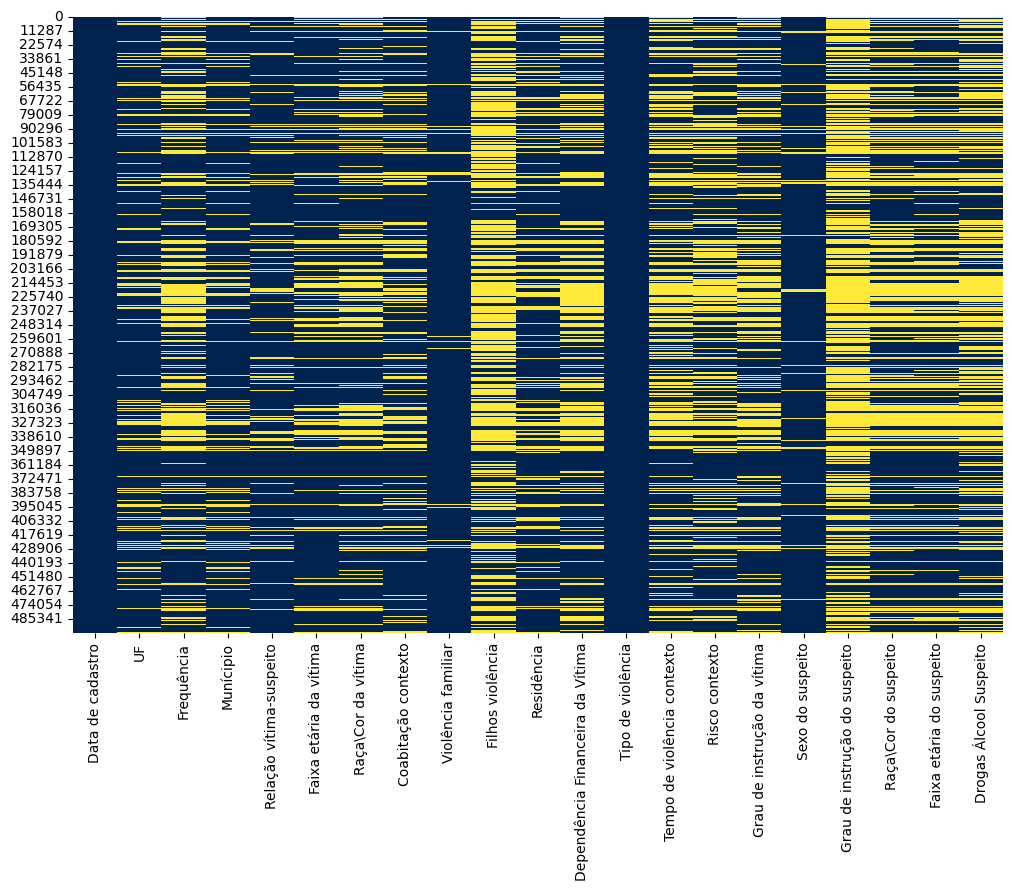

In [62]:
plt.figure(figsize=(12, 8)) 
sns.heatmap(dash_14.isnull(), cbar=False, cmap='cividis')
plt.show()

In [63]:
contagem_vitima =data_2014["Filhos violência"].value_counts()
print(contagem_vitima)

Filhos violência
PRESENCIAM A VIOLÊNCIA                 120509
SOFREM VIOLÊNCIA                        43213
NÃO PRESENCIAM NEM SOFREM VIOLÊNCIA     41725
Name: count, dtype: int64


In [64]:
dash_14.isnull().sum()

Data de cadastro                         0
UF                                   79451
Frequência                          188863
Munícipio                            79379
Relação vítima-suspeito              77202
Faixa etária da vítima              104349
Raça\Cor da vítima                  149139
Coabitação contexto                 122386
Violência familiar                   14181
Filhos violência                    291143
Residência                          121941
Dependência Financeira da Vítima    198803
Tipo de violência                        0
Tempo de violência contexto         209949
Risco contexto                      192098
Grau de instrução da vítima         176064
Sexo do suspeito                     25547
Grau de instrução do suspeito       326210
Raça\Cor do suspeito                207207
Faixa etária do suspeito            186047
Drogas Álcool Suspeito              238128
dtype: int64

In [65]:
dash_14 = dash_14.dropna()

In [66]:
dash_14.info()

<class 'pandas.core.frame.DataFrame'>
Index: 81052 entries, 3 to 496348
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype          
---  ------                            --------------  -----          
 0   Data de cadastro                  81052 non-null  timedelta64[ns]
 1   UF                                81052 non-null  object         
 2   Frequência                        81052 non-null  object         
 3   Munícipio                         81052 non-null  object         
 4   Relação vítima-suspeito           81052 non-null  object         
 5   Faixa etária da vítima            81052 non-null  object         
 6   Raça\Cor da vítima                81052 non-null  object         
 7   Coabitação contexto               81052 non-null  object         
 8   Violência familiar                81052 non-null  object         
 9   Filhos violência                  81052 non-null  object         
 10  Residência                        8105

In [20]:
data_2014.isnull().sum()

Data de cadastro                         0
UF                                   79451
Munícipio                            79379
Violação                             37212
Residência                          121941
Filhos violência                    291143
Relação vítima-suspeito              77202
Comportamento efeito agressor       339096
Tipo de violência                        0
Violência familiar                   14181
Denunciante                          23703
Frequência                          188863
Drogas Álcool Suspeito              238128
Filhos vítima                       199079
Dependência Financeira da Vítima    198803
Tempo de violência contexto         209949
Coabitação contexto                 122386
Risco contexto                      192098
Sexo da vítima                        4761
Sexo do suspeito                     25547
Raça\Cor da vítima                  149139
Raça\Cor do suspeito                207207
Faixa etária da vítima              104349
Faixa etári

In [21]:
data_2014.notnull().sum()

Data de cadastro                    496590
UF                                  417139
Munícipio                           417211
Violação                            459378
Residência                          374649
Filhos violência                    205447
Relação vítima-suspeito             419388
Comportamento efeito agressor       157494
Tipo de violência                   496590
Violência familiar                  482409
Denunciante                         472887
Frequência                          307727
Drogas Álcool Suspeito              258462
Filhos vítima                       297511
Dependência Financeira da Vítima    297787
Tempo de violência contexto         286641
Coabitação contexto                 374204
Risco contexto                      304492
Sexo da vítima                      491829
Sexo do suspeito                    471043
Raça\Cor da vítima                  347451
Raça\Cor do suspeito                289383
Faixa etária da vítima              392241
Faixa etári

# Dados 2019

In [19]:
data_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130490 entries, 0 to 130489
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   Data de cadastro               130490 non-null  object
 1   Canal de atendimento           130490 non-null  object
 2   Sub grupo violação             115324 non-null  object
 3   Cenário da violação            130217 non-null  object
 4   Frequência                     111745 non-null  object
 5   Relação Demandante Vítima      127961 non-null  object
 6   Relação vítima-suspeito        127993 non-null  object
 7   Município da vítima            129136 non-null  object
 8   UF da vítima                   130133 non-null  object
 9   Faixa etária da vítima         125087 non-null  object
 10  Estado civil da vítima         109701 non-null  object
 11  Sexo da vítima                 128054 non-null  object
 12  Grau de instrução da vítima    105667 non-nu

In [23]:
data_2019.isnull().sum()

Data de cadastro                     0
Canal de atendimento                 0
Sub grupo violação               15166
Cenário da violação                273
Frequência                       18745
Relação Demandante Vítima         2529
Relação vítima-suspeito           2497
Município da vítima               1354
UF da vítima                       357
Faixa etária da vítima            5403
Estado civil da vítima           20789
Sexo da vítima                    2436
Grau de instrução da vítima      24823
Orientação sexual da vítima      32014
Raça\Cor da vítima                8496
Município do suspeito             3207
UF do suspeito                    2207
Faixa etária do suspeito         22882
Estado civil do suspeito         47019
Sexo do suspeito                 10639
Grau de instrução do suspeito    69610
Orientação sexual do suspeito    61136
Raça\Cor do suspeito             23573
Violações                          215
dtype: int64

In [24]:
data_2019.notnull().sum()

Data de cadastro                 130490
Canal de atendimento             130490
Sub grupo violação               115324
Cenário da violação              130217
Frequência                       111745
Relação Demandante Vítima        127961
Relação vítima-suspeito          127993
Município da vítima              129136
UF da vítima                     130133
Faixa etária da vítima           125087
Estado civil da vítima           109701
Sexo da vítima                   128054
Grau de instrução da vítima      105667
Orientação sexual da vítima       98476
Raça\Cor da vítima               121994
Município do suspeito            127283
UF do suspeito                   128283
Faixa etária do suspeito         107608
Estado civil do suspeito          83471
Sexo do suspeito                 119851
Grau de instrução do suspeito     60880
Orientação sexual do suspeito     69354
Raça\Cor do suspeito             106917
Violações                        130275
dtype: int64

In [56]:
data_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130490 entries, 0 to 130489
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   Data de cadastro               130490 non-null  object
 1   Canal de atendimento           130490 non-null  object
 2   Sub grupo violação             115324 non-null  object
 3   Cenário da violação            130217 non-null  object
 4   Frequência                     111745 non-null  object
 5   Relação Demandante Vítima      127961 non-null  object
 6   Relação vítima-suspeito        127993 non-null  object
 7   Município da vítima            129136 non-null  object
 8   UF da vítima                   130133 non-null  object
 9   Faixa etária da vítima         125087 non-null  object
 10  Estado civil da vítima         109701 non-null  object
 11  Sexo da vítima                 128054 non-null  object
 12  Grau de instrução da vítima    105667 non-nu

In [67]:
dash_19 = data_2019.drop(columns=['Canal de atendimento', 'Relação Demandante Vítima'])

In [58]:
contagem_vitima =data_2019["Relação Demandante Vítima"].value_counts()
print(contagem_vitima)

Relação Demandante Vítima
NAO SE APLICA        122981
PROPRIA VITIMA         2703
DESCONHECIDO(A)        1267
FILHO(A)                182
VIZINHO(A)              133
MAE                     124
IRMAO(A)                116
COMPANHEIRO(A)           89
AMIGO(A)                 63
EX-COMPANHEIRO(A)        51
ESPOSA                   46
TIO(A)                   25
SOBRINHO(A)              22
FAMILIARES               22
PRIMO(A)                 21
NAMORADO(A)              17
EX-ESPOSA                12
SOGRO(A)                 10
EX-NAMORADA              10
NETO(A)                   9
CUNHADO(A)                9
PAI                       9
AVO(O)                    7
PROFESSOR(A)              7
EX-NAMORADO               4
ENTEADO(A)                4
MARIDO                    4
GENRO/NORA                3
PADRASTO                  3
EMPREGADO(A)              3
MADRASTA                  2
LIDER RELIGIOSO           2
CHEFE(A)                  1
Name: count, dtype: int64


In [68]:
dash_19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130490 entries, 0 to 130489
Data columns (total 22 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   Data de cadastro               130490 non-null  object
 1   Sub grupo violação             115324 non-null  object
 2   Cenário da violação            130217 non-null  object
 3   Frequência                     111745 non-null  object
 4   Relação vítima-suspeito        127993 non-null  object
 5   Município da vítima            129136 non-null  object
 6   UF da vítima                   130133 non-null  object
 7   Faixa etária da vítima         125087 non-null  object
 8   Estado civil da vítima         109701 non-null  object
 9   Sexo da vítima                 128054 non-null  object
 10  Grau de instrução da vítima    105667 non-null  object
 11  Orientação sexual da vítima    98476 non-null   object
 12  Raça\Cor da vítima             121994 non-nu

In [69]:
dash_19 = dash_19.dropna()

In [70]:
dash_19.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32633 entries, 1 to 130480
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Data de cadastro               32633 non-null  object
 1   Sub grupo violação             32633 non-null  object
 2   Cenário da violação            32633 non-null  object
 3   Frequência                     32633 non-null  object
 4   Relação vítima-suspeito        32633 non-null  object
 5   Município da vítima            32633 non-null  object
 6   UF da vítima                   32633 non-null  object
 7   Faixa etária da vítima         32633 non-null  object
 8   Estado civil da vítima         32633 non-null  object
 9   Sexo da vítima                 32633 non-null  object
 10  Grau de instrução da vítima    32633 non-null  object
 11  Orientação sexual da vítima    32633 non-null  object
 12  Raça\Cor da vítima             32633 non-null  object
 13  Munic

# Dados 2020

In [74]:
data_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332433 entries, 0 to 332432
Data columns (total 60 columns):
 #   Column                                            Non-Null Count   Dtype  
---  ------                                            --------------   -----  
 0   Data de cadastro                                  332433 non-null  object 
 1   Canal de atendimento                              332406 non-null  object 
 2   Denúncia emergencial                              331996 non-null  object 
 3   Denunciante                                       332388 non-null  object 
 4   Cenário da violação                               331096 non-null  object 
 5   País                                              332369 non-null  object 
 6   UF                                                320538 non-null  object 
 7   Município                                         317770 non-null  object 
 8   Frequência                                        316039 non-null  object 
 9   Iníc

In [ ]:
# df_vitima = df_vitima.drop(columns=["sl vitima naturalizado uf","UF","Município da vítima",
# a"Data de cadastro","vitima especificacao etnia","Etnia da vítima","Deficiência da vítima", "Município","País da vítima",
# "sl vitima naturalizado municipio", "Violações", "País", "Motivações",
# "Orientação sexual da vítima", "Vítima preso(a)", "sl vitima cadastro", "Doença rara da vítima"])

In [84]:
columns_vitima_20 = [
    "Município",
    "Data de cadastro","UF",
    "Faixa etária da vítima",
    "Faixa de renda da vítima",
    "Raça\\Cor da vítima",
    "Grau de instrução da vítima",
    "Profissão da vítima",
    "UF da vítima",
]

columns_suspeito_20 = [
    "Sexo do suspeito",
    "Grau de instrução do suspeito",
    "Raça\\Cor do suspeito",
    "Faixa etária do suspeito",
    "UF do suspeito",
    "Profissão do suspeito"
    
]


dash_20 = pd.concat([data_2020[columns_vitima_20], data_2020[columns_suspeito_20]], axis=1)

In [78]:
# columns_vitima_14 = [
#     "Data de cadastro","UF",
#     "Frequência",
#     "Munícipio",
#     "Relação vítima-suspeito",
#     "Faixa etária da vítima",
#     #"Faixa de renda da vítima",
#     "Raça\\Cor da vítima",
#     "Coabitação contexto",
#     "Violência familiar",
#     "Filhos violência",
#     "Residência",
#     "Dependência Financeira da Vítima",
#     "Tipo de violência",
#     "Tempo de violência contexto",
#     "Risco contexto",
#     "Grau de instrução da vítima"
#     #"Profissão da vítima",
#     #"UF da vítima",
#     #falta cenário de violação e estado civil!
# ]

# columns_suspeito_14 = [
#     "Sexo do suspeito",
#     "Grau de instrução do suspeito",
#     "Raça\\Cor do suspeito",
#     "Faixa etária do suspeito",
#     "Drogas Álcool Suspeito"
#     #"UF do suspeito",
#     """<class 'pandas.core.frame.DataFrame'>
# RangeIndex: 130490 entries, 0 to 130489
# Data columns (total 24 columns):
#  #   Column                         Non-Null Count   Dtype 
# ---  ------                         --------------   ----- 
#  0   Data de cadastro               130490 non-null  object
#  1   Canal de atendimento           130490 non-null  object
#  2   Sub grupo violação             115324 non-null  object
#  3   Cenário da violação            130217 non-null  object
#  4   Frequência                     111745 non-null  object
#  5   Relação Demandante Vítima      127961 non-null  object
#  6   Relação vítima-suspeito        127993 non-null  object
#  7   Município da vítima            129136 non-null  object
#  8   UF da vítima                   130133 non-null  object
#  9   Faixa etária da vítima         125087 non-null  object
#  10  Estado civil da vítima         109701 non-null  object
#  11  Sexo da vítima                 128054 non-null  object
#  12  Grau de instrução da vítima    105667 non-null  object
#  13  Orientação sexual da vítima    98476 non-null   object
#  14  Raça\Cor da vítima             121994 non-null  object
#  15  Município do suspeito          127283 non-null  object
#  16  UF do suspeito                 128283 non-null  object
#  17  Faixa etária do suspeito       107608 non-null  object
#  18  Estado civil do suspeito       83471 non-null   object
#  19  Sexo do suspeito               119851 non-null  object
#  20  Grau de instrução do suspeito  60880 non-null   object
#  21  Orientação sexual do suspeito  69354 non-null   object
#  22  Raça\Cor do suspeito           106917 non-null  object
#  23  Violações       """
#     #"Profissão do suspeito"
    
# ]

# dash_14 = pd.concat([data_2014[columns_vitima_14], data_2014[columns_suspeito_14]], axis=1)

In [85]:
dash_20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332433 entries, 0 to 332432
Data columns (total 15 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   Município                      317770 non-null  object
 1   Data de cadastro               332433 non-null  object
 2   UF                             320538 non-null  object
 3   Faixa etária da vítima         321820 non-null  object
 4   Faixa de renda da vítima       126428 non-null  object
 5   Raça\Cor da vítima             288351 non-null  object
 6   Grau de instrução da vítima    194345 non-null  object
 7   Profissão da vítima            332433 non-null  object
 8   UF da vítima                   329616 non-null  object
 9   Sexo do suspeito               306313 non-null  object
 10  Grau de instrução do suspeito  75415 non-null   object
 11  Raça\Cor do suspeito           218655 non-null  object
 12  Faixa etária do suspeito       267095 non-nu

In [86]:
dash_20.isnull().sum()

Município                         14663
Data de cadastro                      0
UF                                11895
Faixa etária da vítima            10613
Faixa de renda da vítima         206005
Raça\Cor da vítima                44082
Grau de instrução da vítima      138088
Profissão da vítima                   0
UF da vítima                       2817
Sexo do suspeito                  26120
Grau de instrução do suspeito    257018
Raça\Cor do suspeito             113778
Faixa etária do suspeito          65338
UF do suspeito                    15732
Profissão do suspeito                 0
dtype: int64

In [82]:
dash_20 = dash_20.dropna()

In [83]:
dash_20.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43167 entries, 47 to 172766
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Município                      43167 non-null  object
 1   Data de cadastro               43167 non-null  object
 2   UF                             43167 non-null  object
 3   Faixa etária da vítima         43167 non-null  object
 4   Faixa de renda da vítima       43167 non-null  object
 5   Raça\Cor da vítima             43167 non-null  object
 6   Grau de instrução da vítima    43167 non-null  object
 7   Profissão da vítima            43167 non-null  object
 8   UF da vítima                   43167 non-null  object
 9   Sexo do suspeito               43167 non-null  object
 10  Grau de instrução do suspeito  43167 non-null  object
 11  Raça\Cor do suspeito           43167 non-null  object
 12  Faixa etária do suspeito       43167 non-null  object
 13  UF d

In [87]:
data_final = pd.concat([dash_14, dash_19, dash_20])

In [88]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 446118 entries, 3 to 332432
Data columns (total 37 columns):
 #   Column                            Non-Null Count   Dtype 
---  ------                            --------------   ----- 
 0   Data de cadastro                  446118 non-null  object
 1   UF                                401590 non-null  object
 2   Frequência                        113685 non-null  object
 3   Munícipio                         81052 non-null   object
 4   Relação vítima-suspeito           113685 non-null  object
 5   Faixa etária da vítima            435505 non-null  object
 6   Raça\Cor da vítima                402036 non-null  object
 7   Coabitação contexto               81052 non-null   object
 8   Violência familiar                81052 non-null   object
 9   Filhos violência                  81052 non-null   object
 10  Residência                        81052 non-null   object
 11  Dependência Financeira da Vítima  81052 non-null   object
 12  Tipo de

In [89]:
data_final.isnull().sum()

Data de cadastro                         0
UF                                   44528
Frequência                          332433
Munícipio                           365066
Relação vítima-suspeito             332433
Faixa etária da vítima               10613
Raça\Cor da vítima                   44082
Coabitação contexto                 365066
Violência familiar                  365066
Filhos violência                    365066
Residência                          365066
Dependência Financeira da Vítima    365066
Tipo de violência                   365066
Tempo de violência contexto         365066
Risco contexto                      365066
Grau de instrução da vítima         138088
Sexo do suspeito                     26120
Grau de instrução do suspeito       257018
Raça\Cor do suspeito                113778
Faixa etária do suspeito             65338
Drogas Álcool Suspeito              365066
Sub grupo violação                  413485
Cenário da violação                 413485
Município d

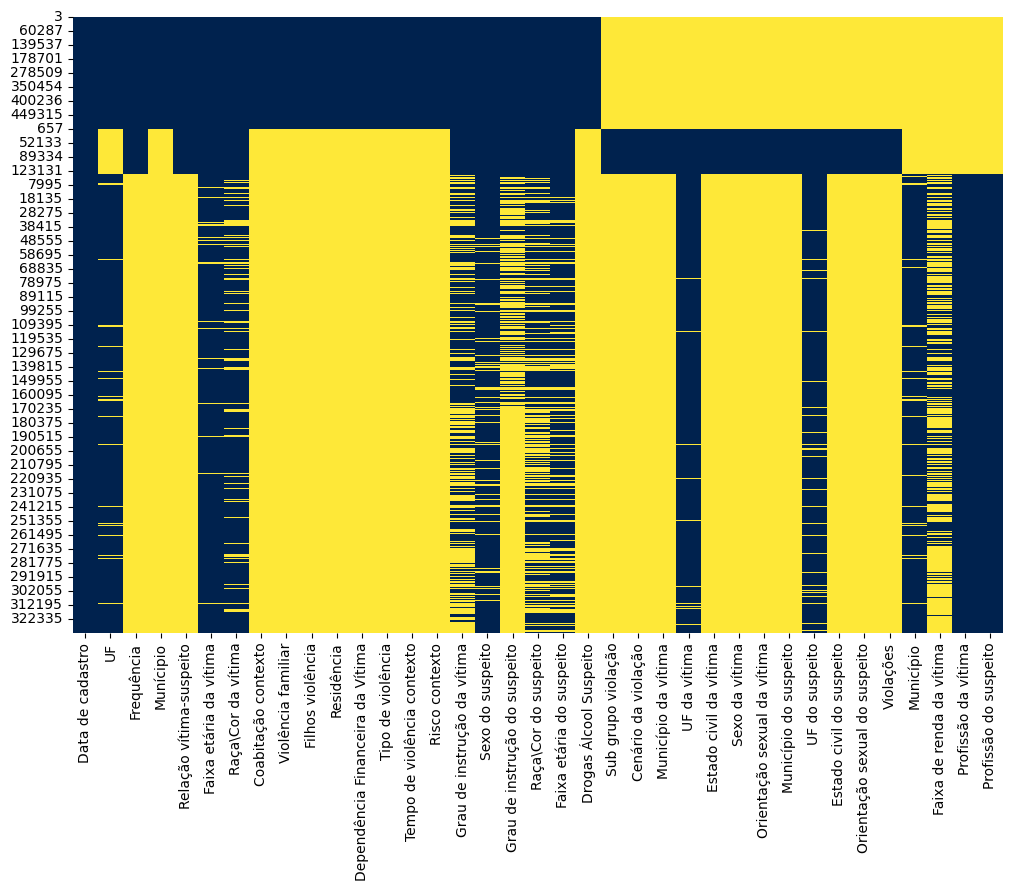

In [90]:
plt.figure(figsize=(12, 8)) 
sns.heatmap(data_final.isnull(), cbar=False, cmap='cividis')
plt.show()

In [91]:
rs = data_final[data_final['UF'] == 'RS'].shape[0]

print(f"Quantidade de registros com UF 'RS': {rs}")


Quantidade de registros com UF 'RS': 21190
